Episode 682, Total Reward: 93.50000000000001


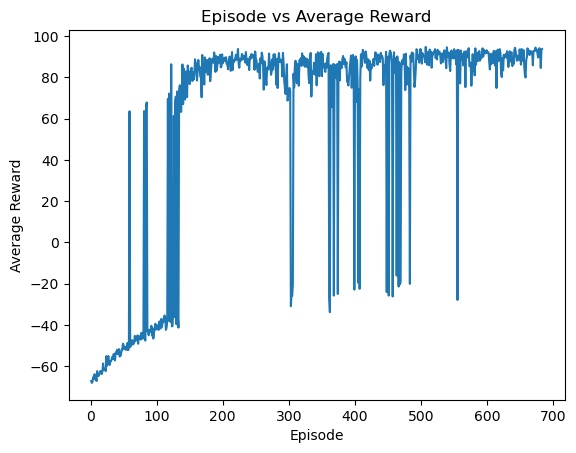

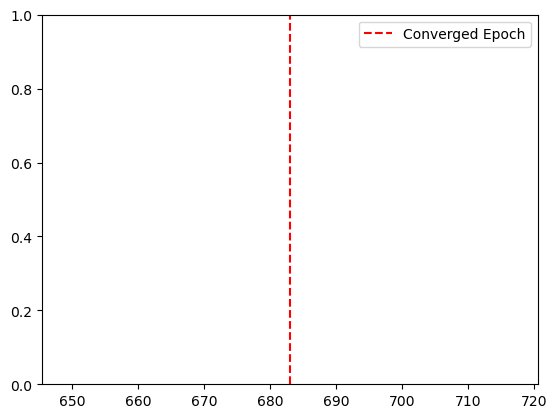

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import gym
from collections import deque
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Define the Q-network
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=32):
        super(QNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.layers(x)

# Define the Deep Q-Network (DQN) agent
class DQNAgent:
    def __init__(self, input_dim, output_dim, hidden_dim=64, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01, batch_size=64, replay_buffer_size=10000):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.batch_size = batch_size
        self.replay_buffer = deque(maxlen=replay_buffer_size)
        self.discrete_actions = [-1, 0, 1]  # Discrete actions for MountainCarContinuous-v0

        self.model = QNetwork(input_dim, output_dim, hidden_dim)
        self.target_model = QNetwork(input_dim, output_dim, hidden_dim)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()

    def select_action(self, state):
        if random.random() < self.epsilon:
            # Epsilon-greedy: Select a discrete action
            return np.random.choice(self.discrete_actions)
        else:
            with torch.no_grad():
                state = torch.FloatTensor(state).unsqueeze(0)
                q_values = self.model(state)
                action_idx = torch.argmax(q_values, dim=1).item()
                return self.discrete_actions[action_idx]

    def remember(self, state, action, reward, next_state, done):
        action_one_hot = np.zeros(len(self.discrete_actions))
        action_one_hot[self.discrete_actions.index(action)] = 1
        self.replay_buffer.append((state, action_one_hot, reward, next_state, done))

#         self.replay_buffer.append((state, action, reward, next_state, done))

    def train(self):
        if len(self.replay_buffer) < self.batch_size:
            return

        batch = random.sample(self.replay_buffer, self.batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

        state_batch = torch.FloatTensor(state_batch)
        action_batch = torch.FloatTensor(action_batch)
        reward_batch = torch.FloatTensor(reward_batch)
        next_state_batch = torch.FloatTensor(next_state_batch)
        done_batch = torch.FloatTensor(done_batch)

        q_values = self.model(state_batch)
        predicted_q_values = torch.sum(q_values * action_batch, dim=1)

        with torch.no_grad():
            next_q_values = self.target_model(next_state_batch)
            max_next_q_values = torch.max(next_q_values, dim=1)[0]
            target_q_values = reward_batch + self.gamma * max_next_q_values * (1 - done_batch)

        loss = self.loss_fn(predicted_q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Create the environment
env = gym.make('MountainCarContinuous-v0')
input_dim = env.observation_space.shape[0]
output_dim = len([-1, 0, 1])  # The output dimension for discrete actions is 3

# Create the DQN agent with discrete actions
agent = DQNAgent(input_dim, output_dim)

# Hyperparameters
epochs = 10000
max_steps_per_episode = 1000
converged_epoch = None
avg_rewards = []


# Training loop
for i in range(epochs):
    state = env.reset()
    total_reward = 0

    for step in range(max_steps_per_episode):
        action = agent.select_action(state)
        # Ensure the action is a one-dimensional array
        if isinstance(action, np.ndarray):
            action = action[0]
        
        next_state, reward, done, _ = env.step([action])

        agent.remember(state, action, reward, next_state, done)
        agent.train()

        total_reward += reward
        state = next_state

        if done:
            break

    agent.decay_epsilon()
    agent.update_target_model()
    
    # Store the episode reward for plotting
    avg_rewards.append(total_reward)
    
    # Check for convergence
    if np.mean(avg_rewards[-100:]) > 90 and len(avg_rewards) >= 100:
        converged_epoch = i + 1
        break


    clear_output(wait=True)
    print(f"Episode {i + 1}, Total Reward: {total_reward}")

env.close()

# Plot episode vs average reward
plt.plot(range(1, len(avg_rewards) + 1), avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Episode vs Average Reward')
plt.show()

# Plot the converged epoch number
if converged_epoch is not None:
    plt.axvline(x=converged_epoch, color='r', linestyle='--', label='Converged Epoch')
    plt.legend()
    plt.show()


# For Continuous Actions

Episode 10000, Total Reward: -0.2674315299222569


ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

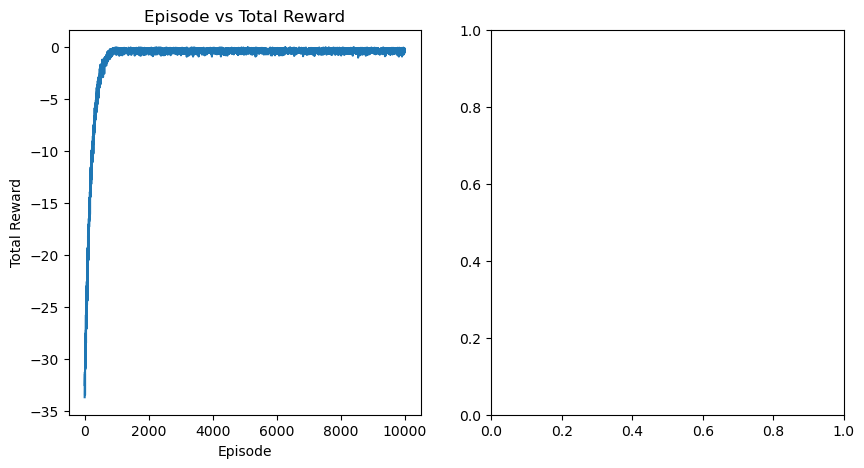

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import gym
from collections import deque
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Define the Q-network
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=32):
        super(QNetwork, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.layers(x)

# Define the Deep Q-Network (DQN) agent
class DQNAgent:
    def __init__(self, input_dim, output_dim, hidden_dim=64, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01, batch_size=64, replay_buffer_size=10000):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.batch_size = batch_size
        self.replay_buffer = deque(maxlen=replay_buffer_size)

        self.model = QNetwork(input_dim, output_dim, hidden_dim)
        self.target_model = QNetwork(input_dim, output_dim, hidden_dim)
        self.target_model.load_state_dict(self.model.state_dict())
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()

    def select_action(self, state):
        if random.random() < self.epsilon:
            return np.random.uniform(-1, 1, size=self.output_dim)
        else:
            with torch.no_grad():
                state = torch.FloatTensor(state).unsqueeze(0)
                q_values = self.model(state)
                return q_values.squeeze().detach().numpy().flatten()

    def remember(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))

    def train(self):
        if len(self.replay_buffer) < self.batch_size:
            return

        batch = random.sample(self.replay_buffer, self.batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

        state_batch = torch.FloatTensor(state_batch)
        action_batch = torch.FloatTensor(action_batch)
        reward_batch = torch.FloatTensor(reward_batch)
        next_state_batch = torch.FloatTensor(next_state_batch)
        done_batch = torch.FloatTensor(done_batch)

        q_values = self.model(state_batch)
        predicted_q_values = torch.sum(q_values * action_batch, dim=1)

        with torch.no_grad():
            next_q_values = self.target_model(next_state_batch)
            max_next_q_values = torch.max(next_q_values, dim=1)[0]
            target_q_values = reward_batch + self.gamma * max_next_q_values * (1 - done_batch)

        loss = self.loss_fn(predicted_q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Create the environment
env = gym.make('MountainCarContinuous-v0')
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.shape[0]

# Create the DQN agent
agent = DQNAgent(input_dim, output_dim)

# Hyperparameters
epochs = 10000
max_steps_per_episode = 1000
episode_rewards = []  # To store the rewards for each episode
avg_rewards_every_100 = []  # To store the average rewards every 100 episodes
window_size = 100


# Training loop
for i in range(epochs):
    state = env.reset()
    total_reward = 0

    for step in range(max_steps_per_episode):
        action = agent.select_action(state)
        # Ensure the action is a one-dimensional array
        if isinstance(action, np.ndarray):
            action = action[0]
        
        next_state, reward, done, _ = env.step([action])

        agent.remember(state, action, reward, next_state, done)
        agent.train()

        total_reward += reward
        state = next_state

        if done:
            break

    agent.decay_epsilon()
    agent.update_target_model()
    
    episode_rewards.append(total_reward)  # Store the total reward for this episode

#     if (i + 1) % window_size == 0:
#         avg_reward = np.mean(episode_rewards[-window_size:])
#         avg_rewards_every_100.append(avg_reward)
#         print(f"Epoch {i + 1}, Average Reward (Last 100 episodes): {avg_reward}")

    clear_output(wait=True)

    clear_output(wait=True)
    print(f"Episode {i + 1}, Total Reward: {total_reward}")

env.close()


# Plot episode vs total reward
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode vs Total Reward')

# Plot episode vs average reward every 100 episodes
plt.subplot(1, 2, 2)
plt.plot(range(window_size, epochs + 1, window_size), avg_rewards_every_100)
plt.xlabel('Epoch')
plt.ylabel('Average Reward (Window Size=100)')
plt.title('Epoch vs Average Reward (Every 100 Epochs)')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Episode vs Average Reward')

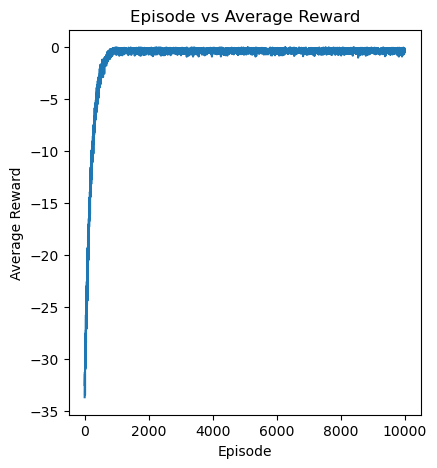

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Episode vs Average Reward')



In [13]:
# Test the trained agent for 10 episodes with rendering
total_test_episodes = 15
test_rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    done = False
    episode_reward = 0

    while not done:
        env.render()  # Render the environment to visualize the agent's actions
        action = agent.select_action(state)  # Choose the action using the learned policy
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state

    test_rewards.append(episode_reward)
    print(f"Episode {episode + 1}, Total Test Reward: {episode_reward}")

# Calculate and print the average test reward over 10 episodes
avg_test_reward = np.mean(test_rewards)
print(f"Average Test Reward over 10 Episodes: {avg_test_reward}")

Episode 1, Total Test Reward: -0.19489483541734426
Episode 2, Total Test Reward: -0.3009948475216917
Episode 3, Total Test Reward: -0.3676987761240279
Episode 4, Total Test Reward: -0.2827126825430004
Episode 5, Total Test Reward: -0.4542369755445237
Episode 6, Total Test Reward: -0.4845427253078659
Episode 7, Total Test Reward: -0.3184937322449805
Episode 8, Total Test Reward: -0.2991028946238154
Episode 9, Total Test Reward: -0.41215461890420346
Episode 10, Total Test Reward: -0.31332167813163386
Episode 11, Total Test Reward: -0.27754776718366836
Episode 12, Total Test Reward: -0.1669271218311976
Episode 13, Total Test Reward: -0.23265221244906537
Episode 14, Total Test Reward: -0.2620607187747056
Episode 15, Total Test Reward: -0.3144546010678896
Average Test Reward over 10 Episodes: -0.31211974584464086
